[522.3988003230567, 516.3860055626709]


3

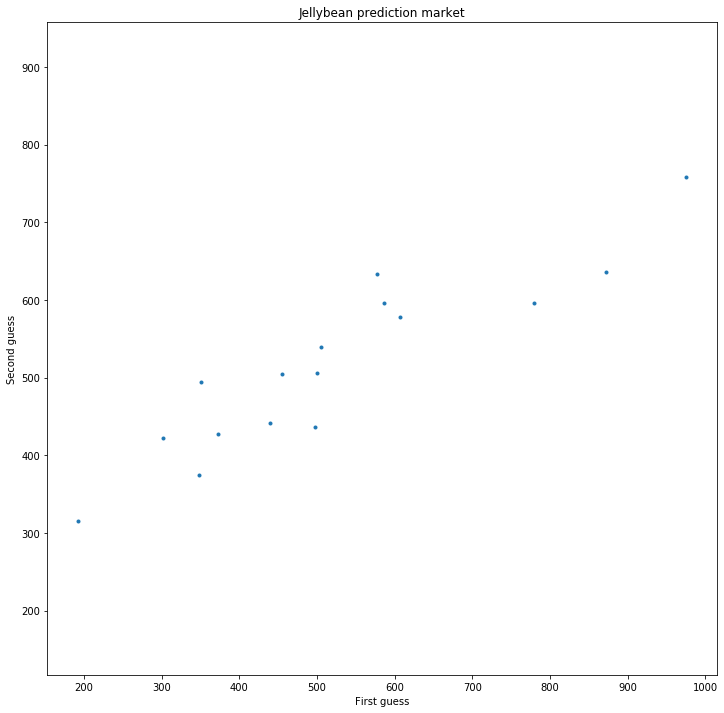

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_guesses = 16

guesses_before = np.random.gamma(5, 100, n_guesses)
guesses_after = guesses_before.copy()
for i in range(n_guesses):
    guesses_after[i] = .5 * (guesses_before[i] + guesses_before[np.random.randint(0, 16, 3)].mean())

plt.figure(figsize=(12, 12))
plt.plot(guesses_before, guesses_after, '.')
plt.axis('equal')
plt.xlabel('First guess')
plt.ylabel('Second guess')
plt.title("Jellybean prediction market")


best_pred = guesses_before.mean()
print([guesses_before.mean(), guesses_after.mean()])
sum([1 for x in guesses_before if abs(x - 500) < abs(best_pred - 500)])
#[guesses_before.std(), guesses_after.std()]

In [53]:
csv = "first_guess,second_guess\n"
for i in range(n_guesses):
    csv += "%d,%d\n" % (guesses_before[i], guesses_after[i])
with open('guesses.csv', 'w') as f:
    f.write(csv)

In [151]:
import pandas as pd
#df_monthly = df.groupby(['Year', 'Month']).mean()

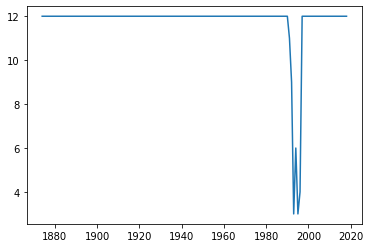

In [102]:
plt.plot(df_monthly.groupby('Year').count()['Max Temp (°C)'])

In [174]:
# Patch in data from Dorval
df = pd.read_csv("mcgill_all.csv").groupby(['Year', 'Month', 'Day']).mean()
df = df.query('Year > 1873 and Year < 2019')

df_yul = pd.read_csv("yul_all.csv").groupby(['Year', 'Month', 'Day']).mean()
#df_monthly_yul = df_yul.groupby(['Year', 'Month']).mean()

bad_idx = df.index[df['Max Temp (°C)'].isna()]
df.loc[bad_idx] = df_yul.loc[bad_idx, :]

bad_idx = df.index[df['Total Rain (mm)'].isna()]
df.loc[bad_idx, 'Total Rain (mm)'] = df_yul.loc[bad_idx, 'Total Rain (mm)']

bad_idx = df.index[df['Total Snow (cm)'].isna()]
df.loc[bad_idx, 'Total Snow (cm)'] = df_yul.loc[bad_idx, 'Total Snow (cm)']
df = df.reset_index()

df['hot_days'] = (df['Max Temp (°C)'] > 30)
df['cold_days'] = (df['Max Temp (°C)'] < -10)
df['winter_rain'] = (df['Total Rain (mm)'] * ((df['Month'] <= 2) | (df['Month'] == 12)))

df_yearly_mean = df.groupby('Year').mean()
df_yearly = df_yearly_mean.reset_index()[['Year', 'Month', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'hot_days', 'cold_days', 'winter_rain']]

the_map = {'Year': 'year', 
         'Month': 'month', 
         'Max Temp (°C)': 'max_temp', 
         'Min Temp (°C)': 'min_temp', 
         'Mean Temp (°C)': 'mean_temp',
         'Heat Deg Days (°C)': 'hot_days', 
         'Cool Deg Days (°C)': 'cool_days', 
         'Total Rain (mm)': 'rain_mm',
         'Total Snow (cm)': 'snow_cm'}
df_yearly = df_yearly.rename(the_map, axis=1)
df_yearly[['rain_mm', 'snow_cm', 'hot_days', 'cold_days', 'winter_rain']] = df_yearly[['rain_mm', 'snow_cm', 'hot_days', 'cold_days', 'winter_rain']] * 365
import csv
df_yearly.to_csv('aggregate_montreal_climate.csv', quoting=csv.QUOTE_NONNUMERIC)

In [172]:
df_yearly.to_csv?

In [ ]:
csv.QUO

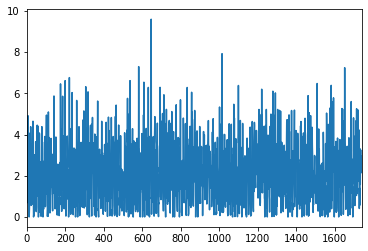

In [146]:
#df_monthly.describe()
df_monthly = df_monthly.reset_index()[['Year', 'Month', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)']]
df_monthly.describe()
df_monthly.columns
the_map = {'Year': 'year', 
         'Month': 'month', 
         'Max Temp (°C)': 'max_temp', 
         'Min Temp (°C)': 'min_temp', 
         'Mean Temp (°C)': 'mean_temp',
         'Heat Deg Days (°C)': 'hot_days', 
         'Cool Deg Days (°C)': 'cool_days', 
         'Total Rain (mm)': 'rain_mm',
         'Total Snow (cm)': 'snow_cm'}
df_monthly.rename(the_map, axis=1)
#df_monthly.to_
df_monthly.to_csv('aggregate_montreal_climate.csv')